<a href="https://colab.research.google.com/github/tamer017/ML-Assessments/blob/master/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kmeans

Running this project require the following imports 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from scipy.spatial.distance import cdist
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from scipy.stats import normaltest, zscore
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from operator import itemgetter
%matplotlib inline

In [2]:

plt.figure(figsize=(16,8))
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X, method = [], num_clusters = 0,kmean = False):
    # color = ["blue","orange","green","red","purple","brown","pink","gray","olive","cyan","yellow","black","lime","magenta"]  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
      sns.scatterplot(X[:, 0], X[:, 1], hue=np.zeros((X.shape[0],)), legend='full',palette="Set1")  
    else:
      labels = method.labels_
      if (num_clusters > 45):
        sns.scatterplot(X[:, 0], X[:, 1], hue=labels,palette="Set1").legend_.remove() 
      else: 
        sns.scatterplot(X[:, 0], X[:, 1], hue=labels, legend='auto',palette="Set1")  
        # plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,ncol=3)
      if (kmean):
        for i in range(num_clusters):
            plt.scatter(method.cluster_centers_[i][0], method.cluster_centers_[i][1], c = "black", marker = 'x', s = 100)   
    plt.show()
  
          

<Figure size 1152x576 with 0 Axes>

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



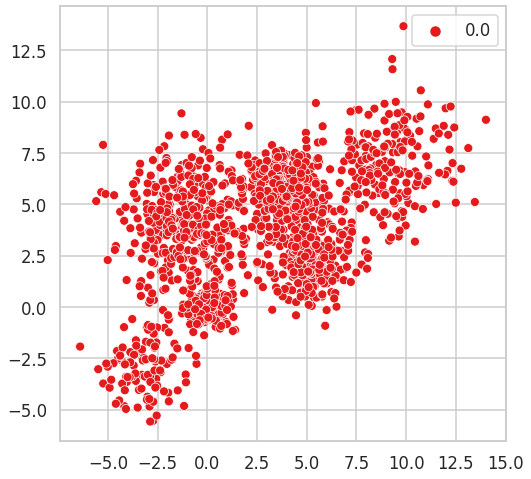

In [ ]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [ ]:
def K_mean(X, min_clusters = 2, max_clusters = 20): 
  distortion_functions = []
  silhouette_scores = []
  inertias = []
  for n_clusters in range(min_clusters, max_clusters+1):
      Kmean = KMeans(n_clusters = n_clusters)
      Kmean.fit(X)
      if X.shape[1] == 2:
        display_cluster(X, method = Kmean, num_clusters = n_clusters,kmean = True)
      distortion_function = sum(np.min(cdist(X, Kmean.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
      inertia = Kmean.inertia_ 
      inertias.append(inertia)
      distortion_functions.append(distortion_function) 
      silhouette_scoree = silhouette_score(X, Kmean.labels_)
      silhouette_scores.append(silhouette_scoree)
      print("For", n_clusters, "clusters,", "the average silhouette_score is :", silhouette_scoree, ", the destortion function is :", distortion_function, ",and inertia is :",inertia)
      plt.show()
  plt.figure(figsize=(16,8))
  plt.plot(list(range(min_clusters,max_clusters+1)), distortion_functions, 'bx-')
  plt.xlabel('k (number of clusters)')
  plt.ylabel('Distortion')
  plt.title('The Elbow Method for distortion showing the optimal k')
  plt.xticks(range(min_clusters,max_clusters+1))
  plt.show()
  plt.figure(figsize=(16,8))
  plt.plot(list(range(min_clusters,max_clusters+1)), inertias, 'bx-')
  plt.xlabel('k (number of clusters)')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method for inertia showing the optimal k')
  plt.xticks(range(min_clusters,max_clusters+1))
  plt.show()
  plt.figure(figsize=(16,8))
  plt.plot(list(range(min_clusters,max_clusters+1)), silhouette_scores, 'bx-')
  plt.xlabel('k (number of clusters)')
  plt.ylabel('Silhouette score ')
  plt.title('The Elbow Method for silhouette score showing the optimal k')
  plt.xticks(range(min_clusters,max_clusters+1))
  plt.show()
  index, element = max(enumerate(silhouette_scores), key=itemgetter(1))
  max_silhouette_score_kmean = {"n_clusters":index+2,"silhouette_score":element}
  return max_silhouette_score_kmean

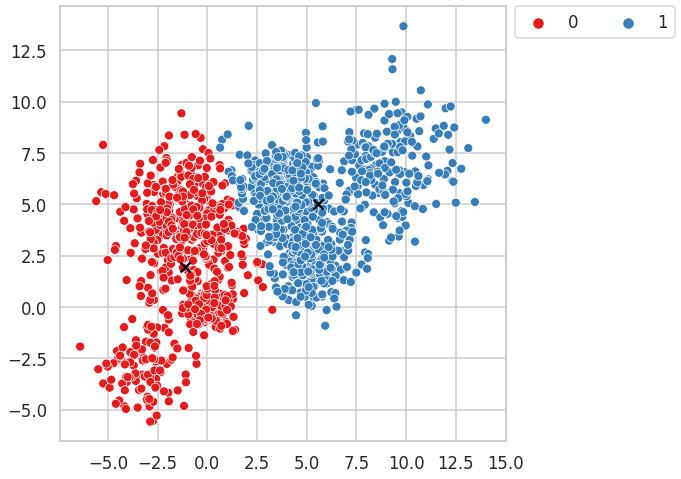

For 2 clusters, the average silhouette_score is : 0.4751544541991239 , the destortion function is : 3.0296089763225997 ,and inertia is : 16716.61917540343


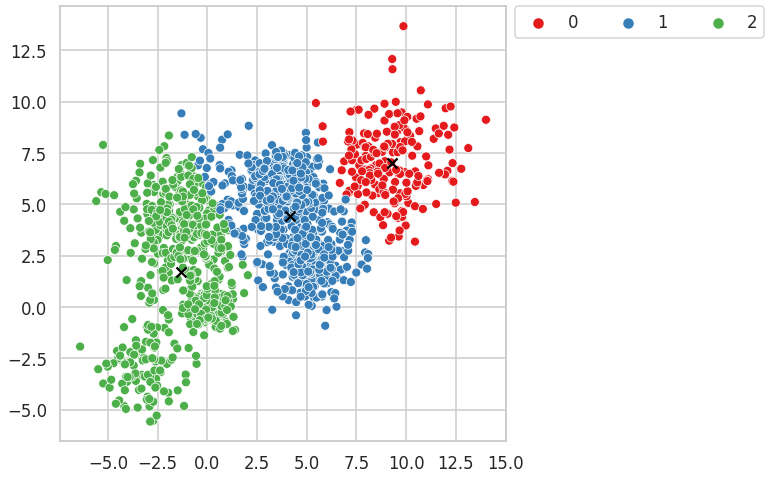

For 3 clusters, the average silhouette_score is : 0.43631793714185435 , the destortion function is : 2.562508619888468 ,and inertia is : 12094.904429675615


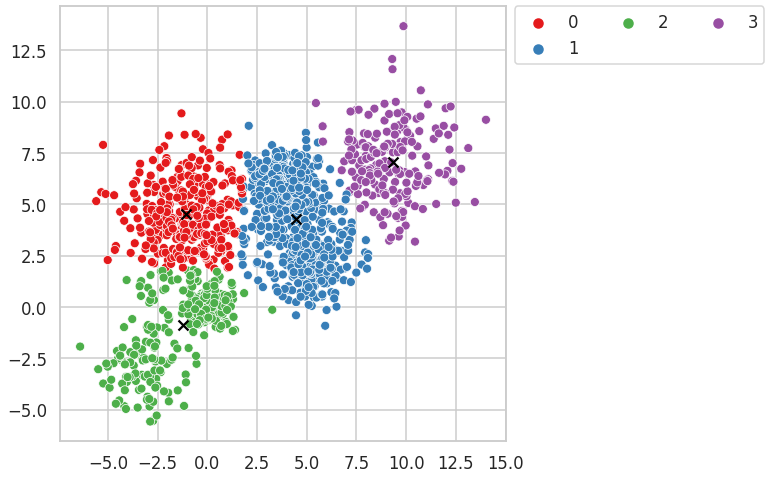

For 4 clusters, the average silhouette_score is : 0.4628725400351352 , the destortion function is : 2.106531373883988 ,and inertia is : 7812.040522678248


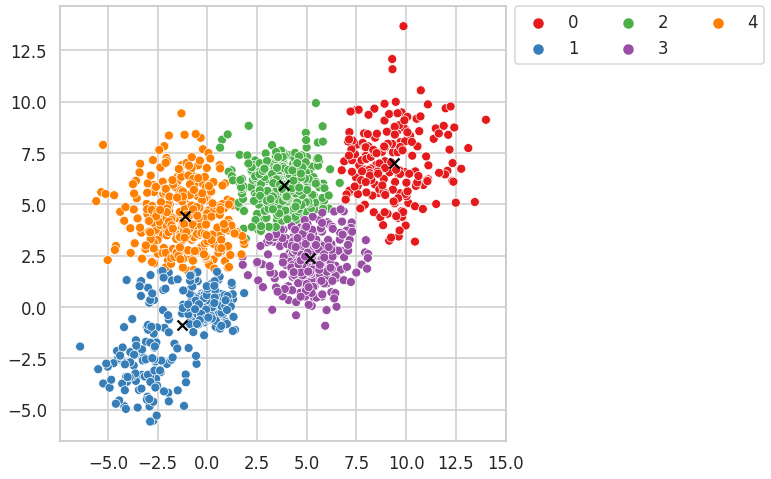

For 5 clusters, the average silhouette_score is : 0.48100602217073096 , the destortion function is : 1.7169227547484112 ,and inertia is : 5600.217515342452


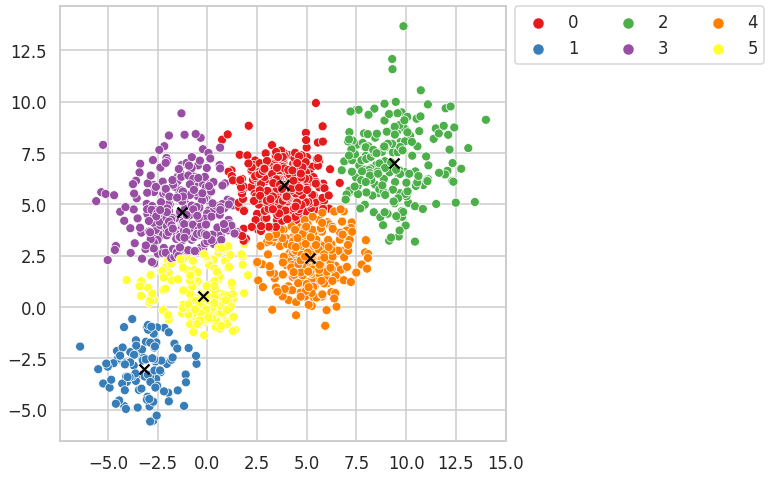

For 6 clusters, the average silhouette_score is : 0.48609303184118463 , the destortion function is : 1.504188850790712 ,and inertia is : 4310.413861022087


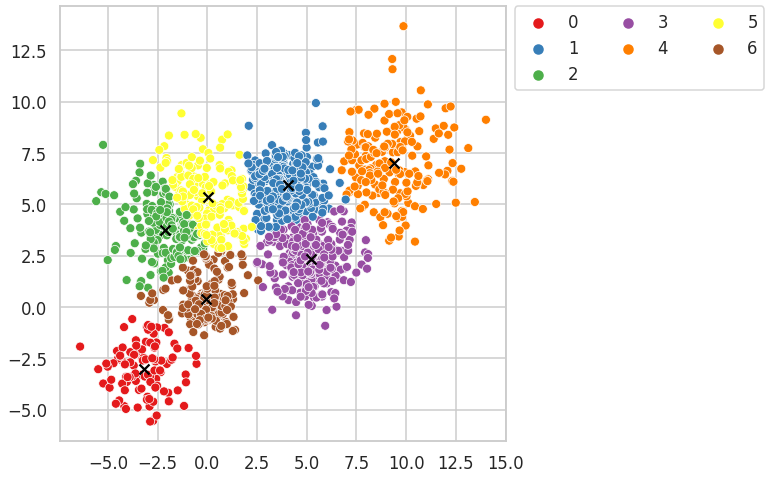

For 7 clusters, the average silhouette_score is : 0.46340972197949165 , the destortion function is : 1.4110078118049556 ,and inertia is : 3811.1633360756578


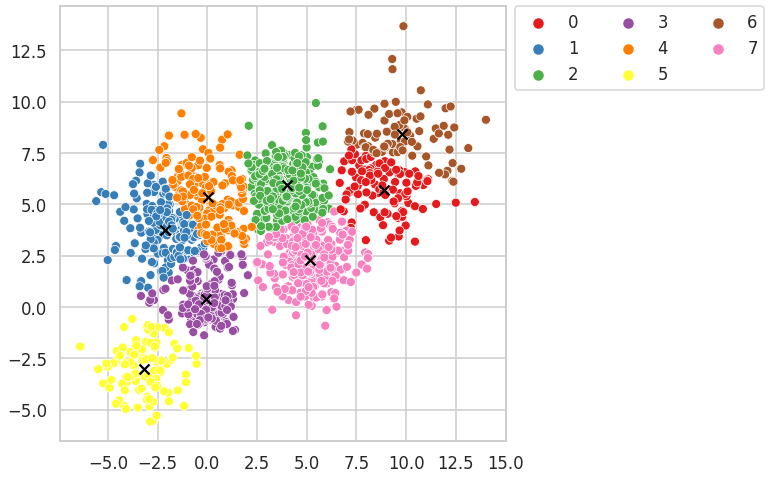

For 8 clusters, the average silhouette_score is : 0.4437992701413617 , the destortion function is : 1.349960730169758 ,and inertia is : 3446.155145612209


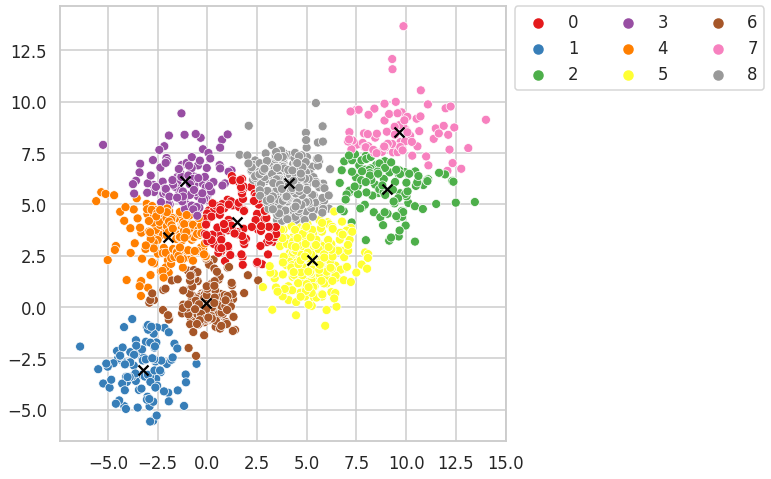

For 9 clusters, the average silhouette_score is : 0.4426845226205554 , the destortion function is : 1.2833105880899816 ,and inertia is : 3090.5470759493646


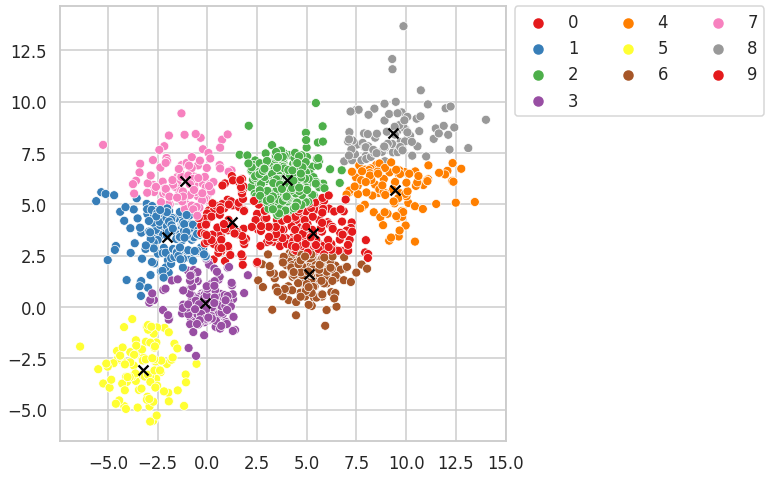

For 10 clusters, the average silhouette_score is : 0.40004624198691435 , the destortion function is : 1.2272660926883479 ,and inertia is : 2850.102928502035


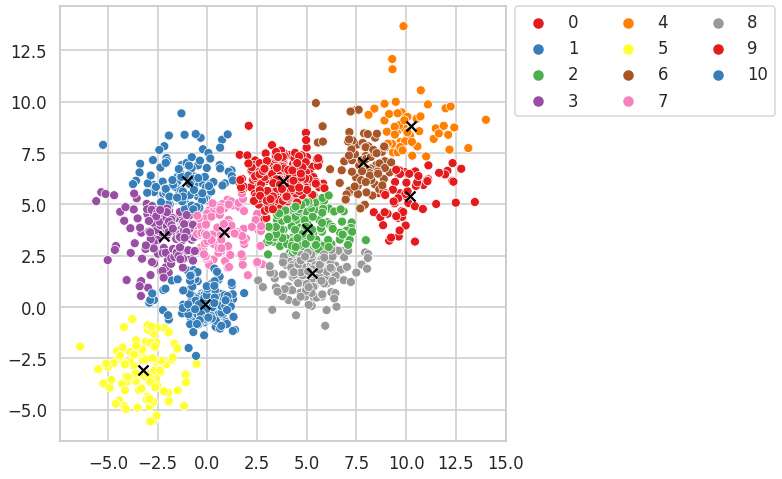

For 11 clusters, the average silhouette_score is : 0.40282173220501527 , the destortion function is : 1.1837225067066848 ,and inertia is : 2617.8463082996077


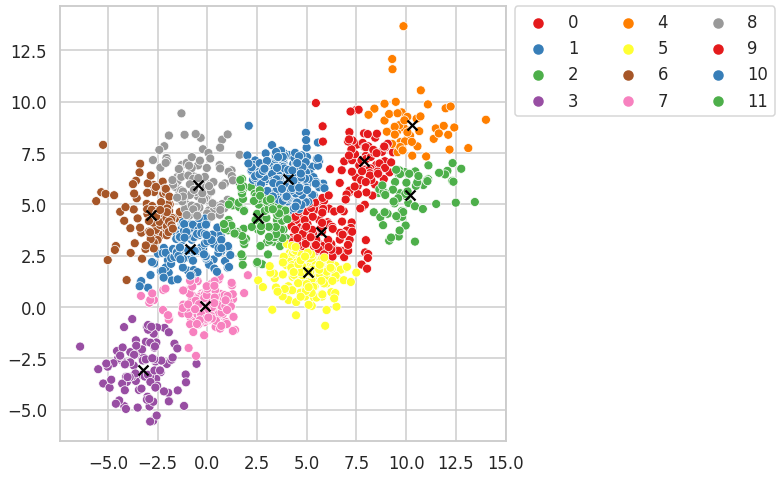

For 12 clusters, the average silhouette_score is : 0.38952937778375424 , the destortion function is : 1.1417684845161271 ,and inertia is : 2438.6206111805363


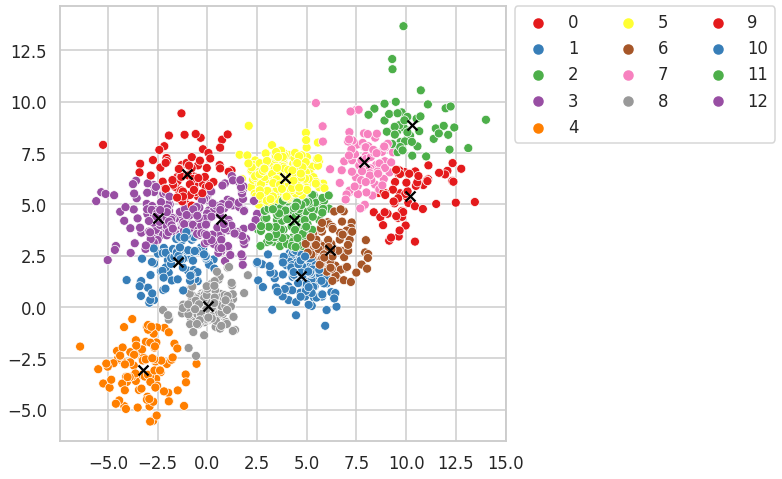

For 13 clusters, the average silhouette_score is : 0.3736940579686428 , the destortion function is : 1.1038710721396263 ,and inertia is : 2278.7572604073976


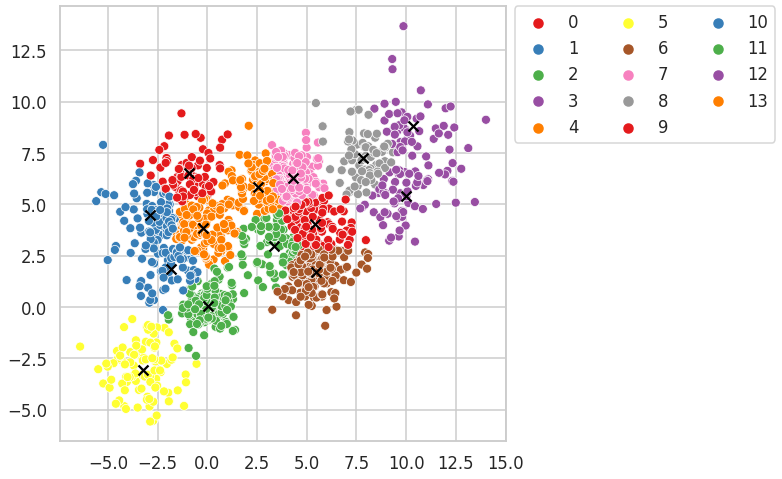

For 14 clusters, the average silhouette_score is : 0.3752047323827094 , the destortion function is : 1.0640817292044507 ,and inertia is : 2112.3167825621103


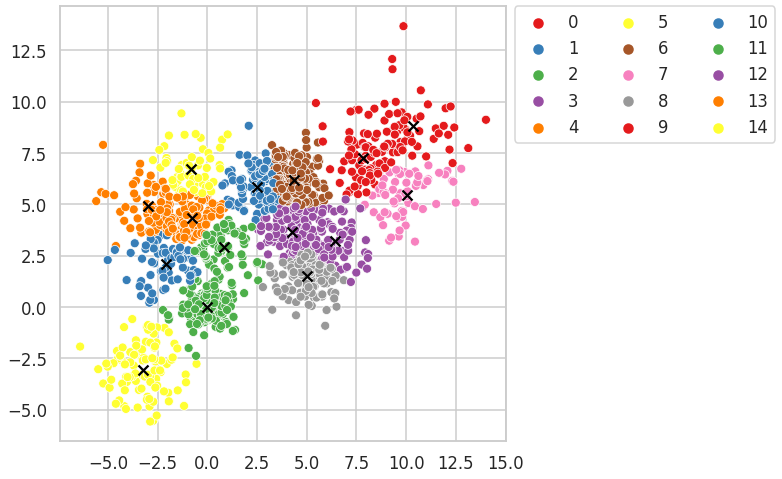

For 15 clusters, the average silhouette_score is : 0.3776341746605537 , the destortion function is : 1.0319409129979187 ,and inertia is : 1986.1241714290927


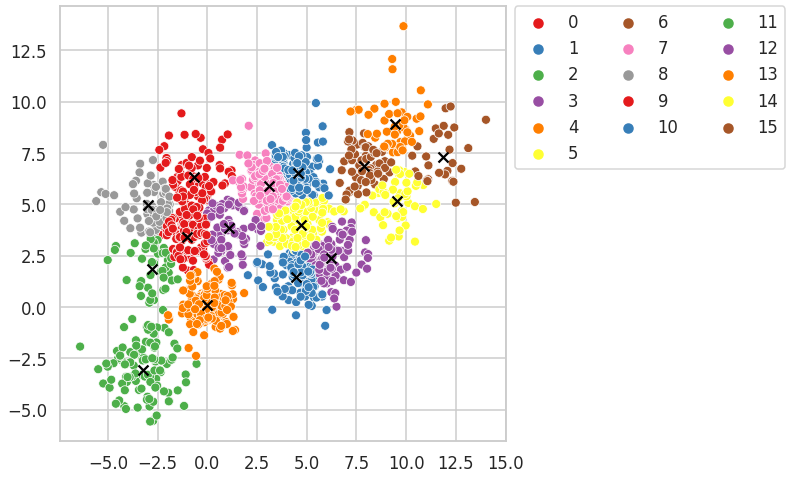

For 16 clusters, the average silhouette_score is : 0.36922194019674454 , the destortion function is : 1.0105727976164418 ,and inertia is : 1892.6101239102709


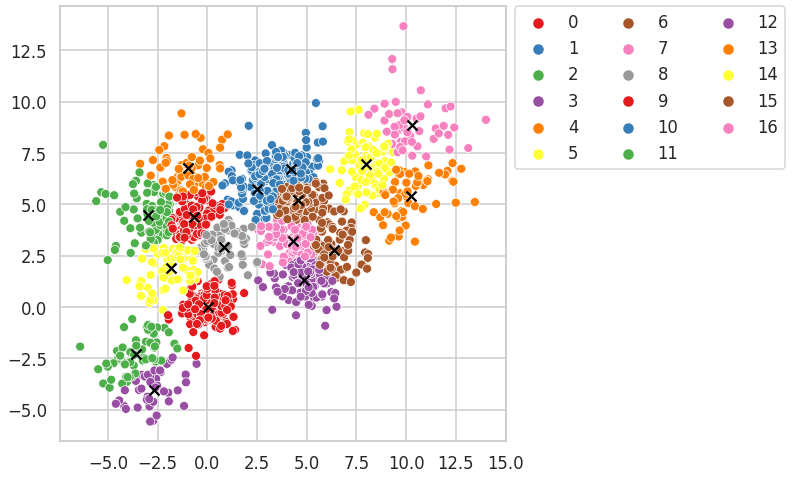

For 17 clusters, the average silhouette_score is : 0.35216386771491515 , the destortion function is : 0.9746017536965373 ,and inertia is : 1784.0286787704003


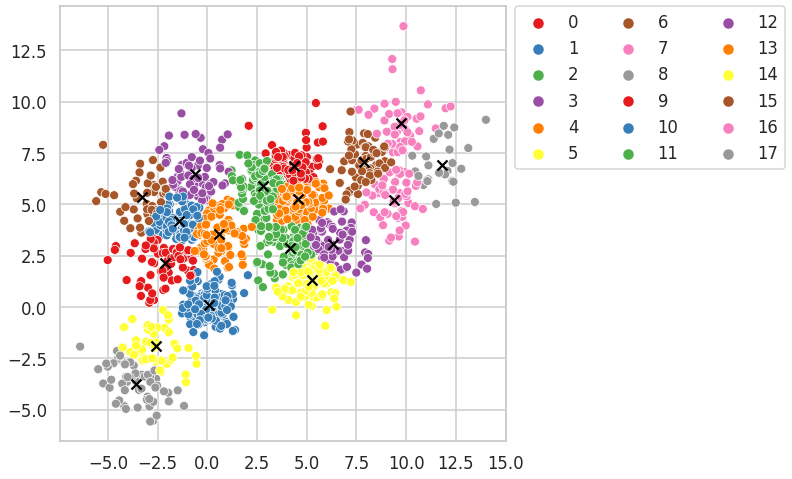

For 18 clusters, the average silhouette_score is : 0.3510226901446492 , the destortion function is : 0.956767707592647 ,and inertia is : 1689.703717852322


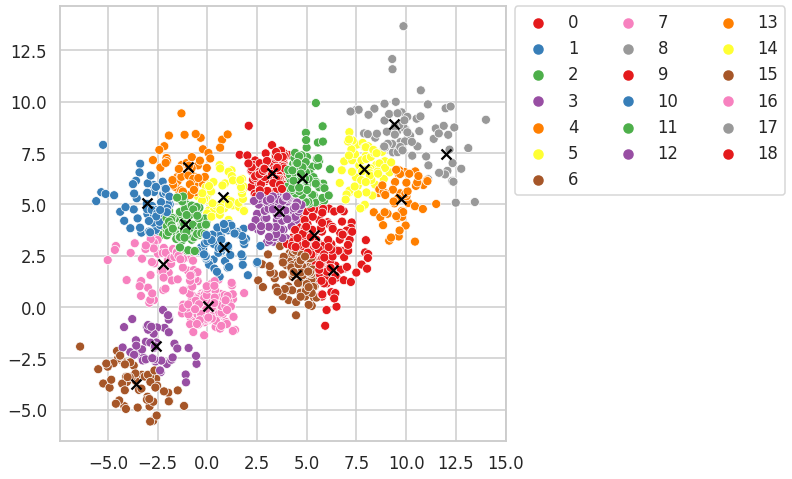

For 19 clusters, the average silhouette_score is : 0.353503627785347 , the destortion function is : 0.930023290355078 ,and inertia is : 1614.050920233181


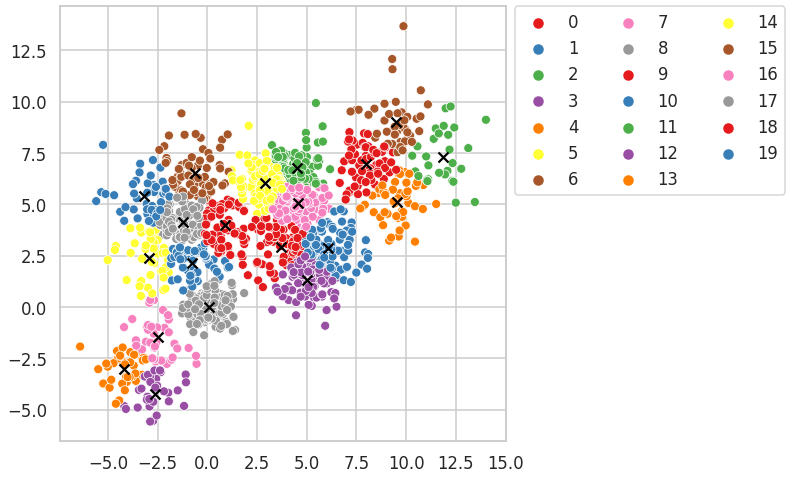

For 20 clusters, the average silhouette_score is : 0.3480923756529901 , the destortion function is : 0.9186910719093361 ,and inertia is : 1546.3549690518912


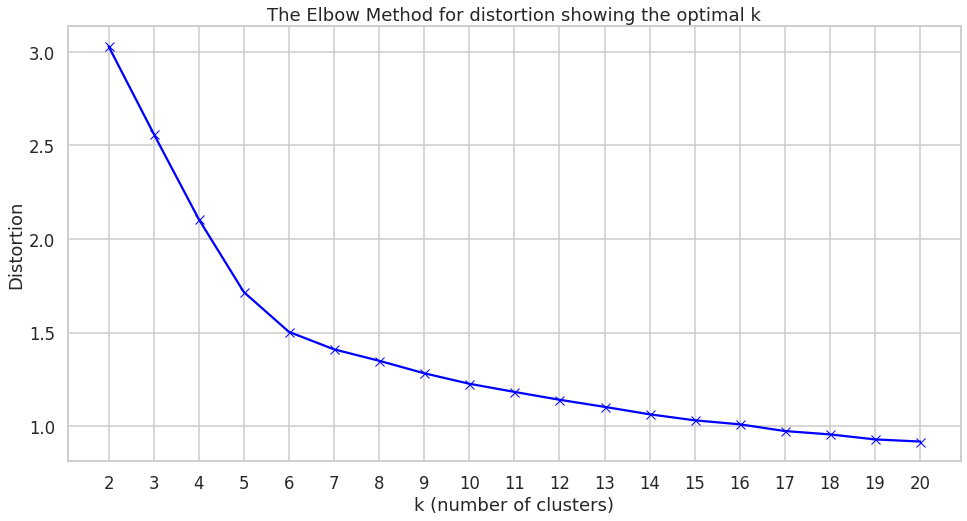

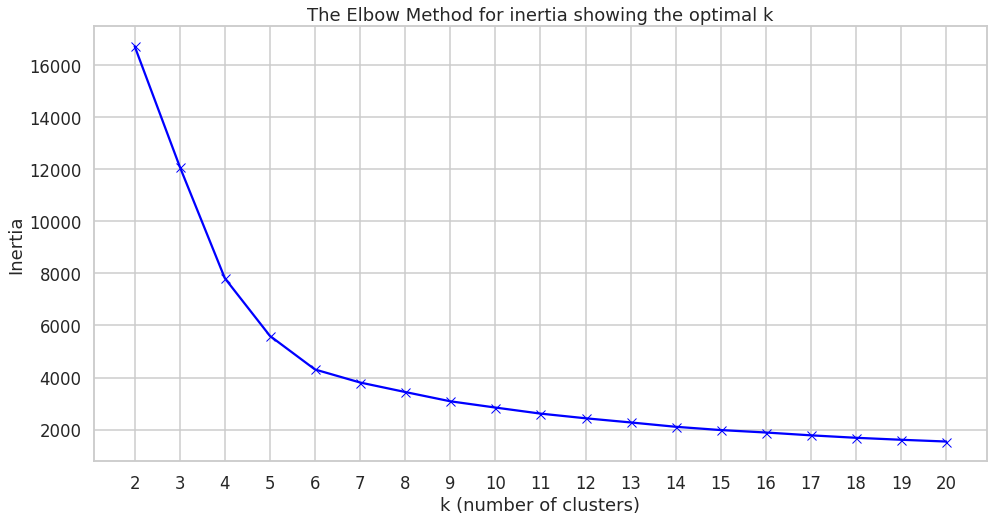

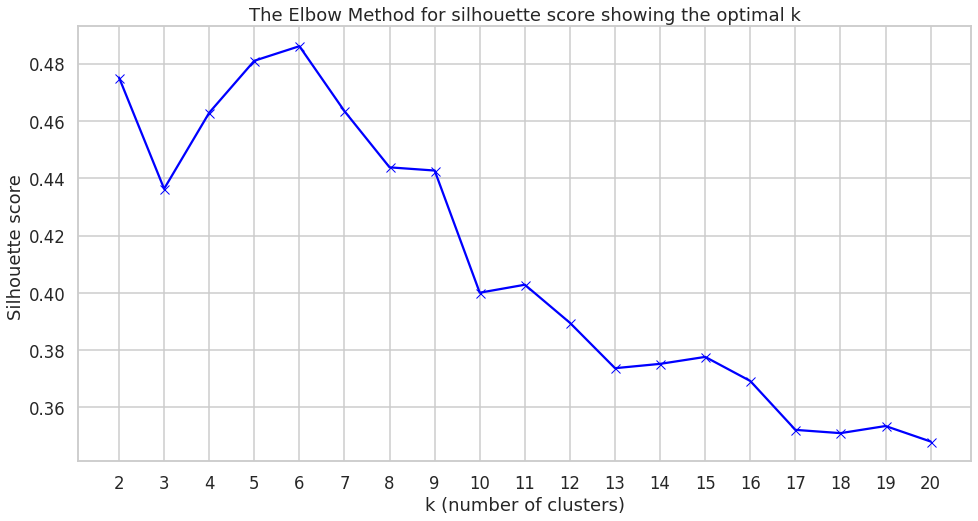

In [ ]:
K_mean(Multi_blob_Data) # 6

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
scaler = StandardScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(iris_data.data)


For 2 clusters, the average silhouette_score is : 0.6810461692117462 , the destortion function is : 0.8555777695266533 ,and inertia is : 152.3479517603579
For 3 clusters, the average silhouette_score is : 0.5528190123564095 , the destortion function is : 0.6480304904934434 ,and inertia is : 78.851441426146
For 4 clusters, the average silhouette_score is : 0.49805050499728737 , the destortion function is : 0.5573847727333312 ,and inertia is : 57.22847321428572
For 5 clusters, the average silhouette_score is : 0.48874888709310566 , the destortion function is : 0.5096521951118286 ,and inertia is : 46.446182051282065
For 6 clusters, the average silhouette_score is : 0.36483400396700255 , the destortion function is : 0.4670733963396438 ,and inertia is : 39.03998724608726
For 7 clusters, the average silhouette_score is : 0.3462460703534074 , the destortion function is : 0.44282551880601356 ,and inertia is : 34.756749639249634
For 8 clusters, the average silhouette_score is : 0.34996644367986

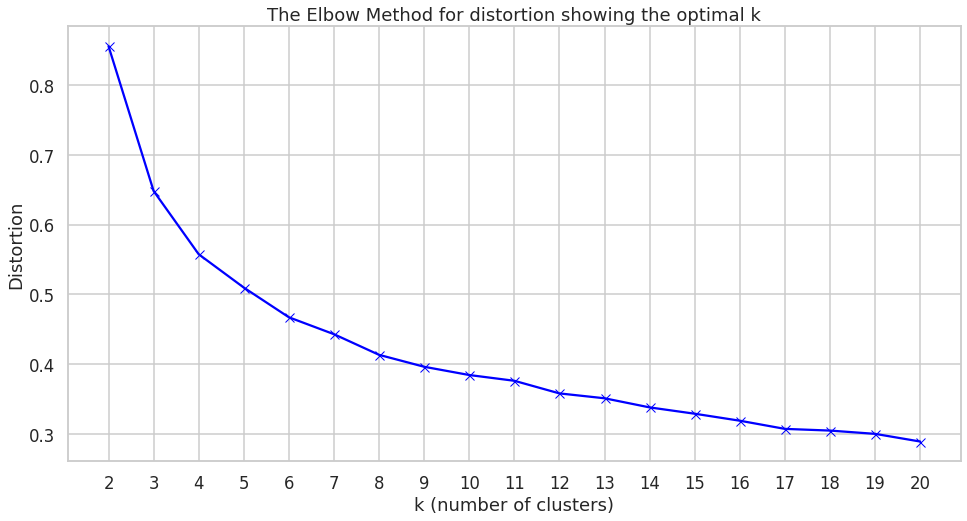

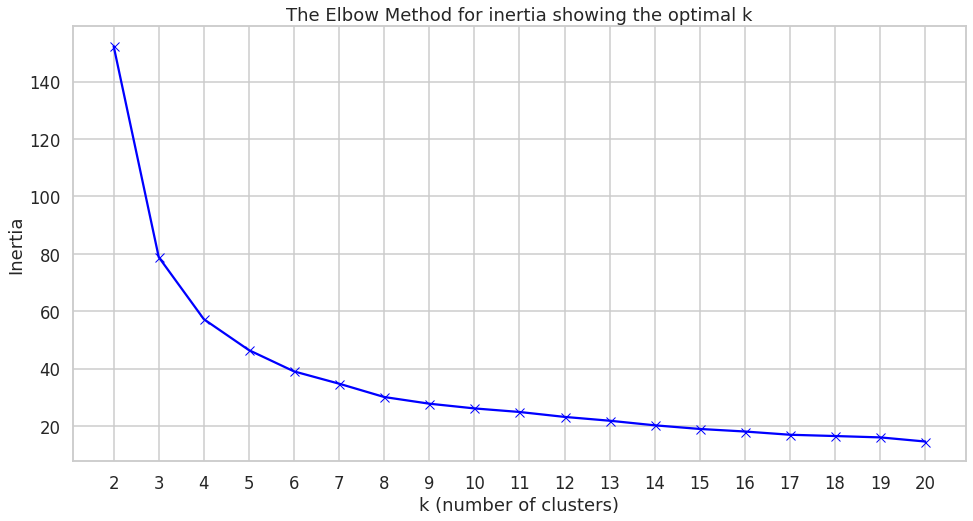

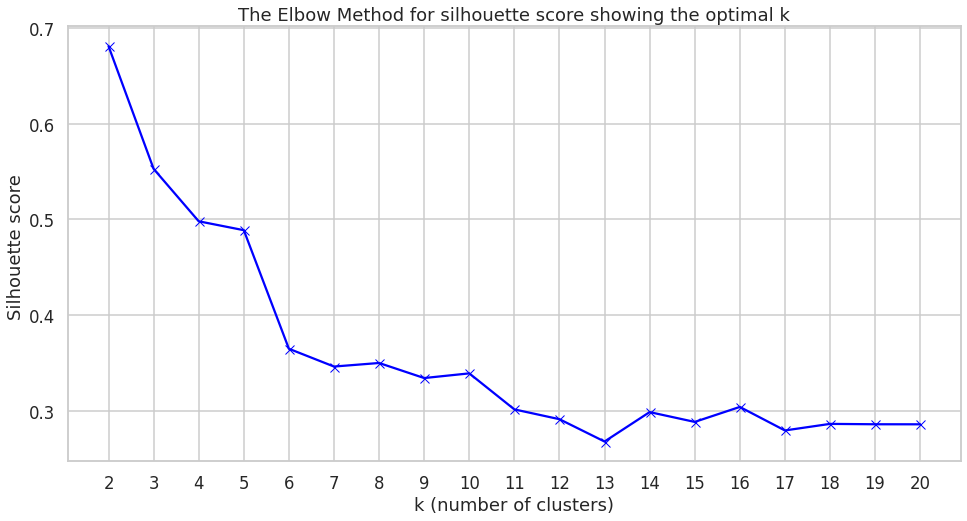

{'n_clusters': 2, 'silhouette_score': 0.6810461692117462}

In [ ]:
K_mean(iris_data.data) # 2

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 

In [ ]:
df = pd.read_csv("/content/Customer data.csv",index_col = "ID")
scaler = StandardScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(df)

For 2 clusters, the average silhouette_score is : 0.24820216342164297 , the destortion function is : 2.173919581574484 ,and inertia is : 10514.621716046855
For 3 clusters, the average silhouette_score is : 0.27172237898695484 , the destortion function is : 1.963752256774182 ,and inertia is : 8630.902246481208
For 4 clusters, the average silhouette_score is : 0.26879180394522123 , the destortion function is : 1.7893352543407437 ,and inertia is : 7169.87082246584
For 5 clusters, the average silhouette_score is : 0.25424044566024484 , the destortion function is : 1.686482116497701 ,and inertia is : 6403.070166206631
For 6 clusters, the average silhouette_score is : 0.2630752333415311 , the destortion function is : 1.6230006073958654 ,and inertia is : 5830.9563029611545
For 7 clusters, the average silhouette_score is : 0.265325782477996 , the destortion function is : 1.5417434527530132 ,and inertia is : 5369.740062786457
For 8 clusters, the average silhouette_score is : 0.28688849154237095

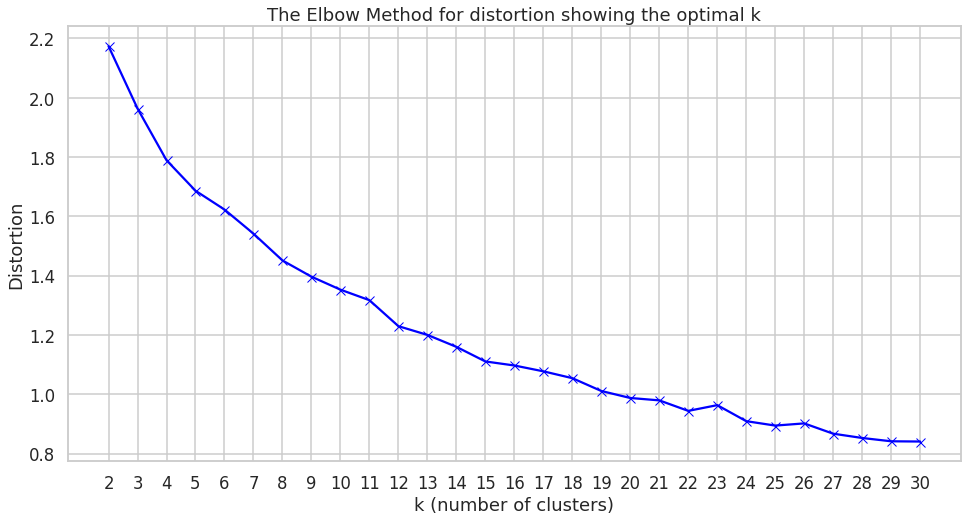

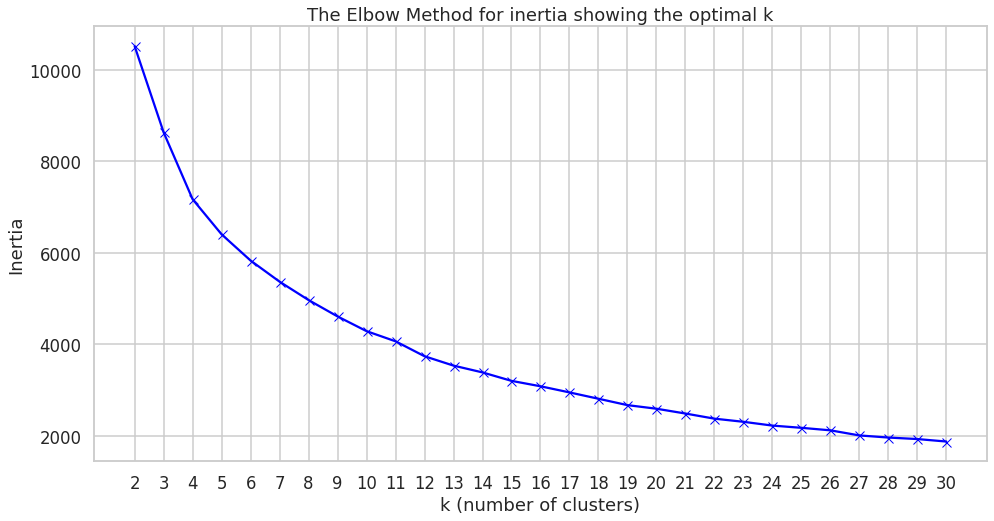

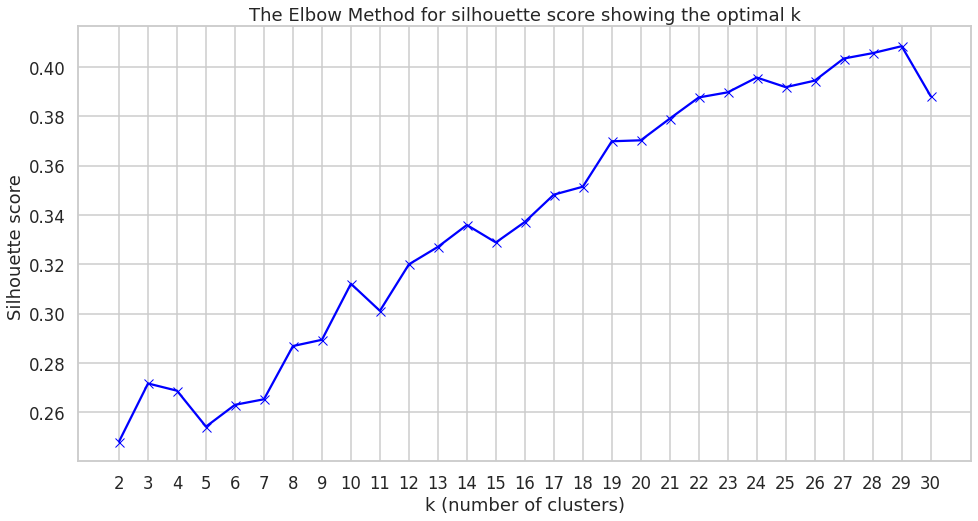

{'n_clusters': 29, 'silhouette_score': 0.40833730270344665}

In [ ]:
K_mean(scaled_data,max_clusters=30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 189.5 KB


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
scaler = StandardScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(iris_data.data)


For 2 clusters, the average silhouette_score is : 0.6810461692117462 , the destortion function is : 0.8555777695266533 ,and inertia is : 152.3479517603579
For 3 clusters, the average silhouette_score is : 0.5528190123564095 , the destortion function is : 0.6480304904934434 ,and inertia is : 78.851441426146
For 4 clusters, the average silhouette_score is : 0.49805050499728737 , the destortion function is : 0.5573847727333312 ,and inertia is : 57.22847321428572
For 5 clusters, the average silhouette_score is : 0.48874888709310566 , the destortion function is : 0.5096521951118286 ,and inertia is : 46.446182051282065
For 6 clusters, the average silhouette_score is : 0.36483400396700255 , the destortion function is : 0.4670733963396438 ,and inertia is : 39.03998724608726
For 7 clusters, the average silhouette_score is : 0.35387107037781307 , the destortion function is : 0.43896290286953604 ,and inertia is : 34.5730308278678
For 8 clusters, the average silhouette_score is : 0.359745492384576

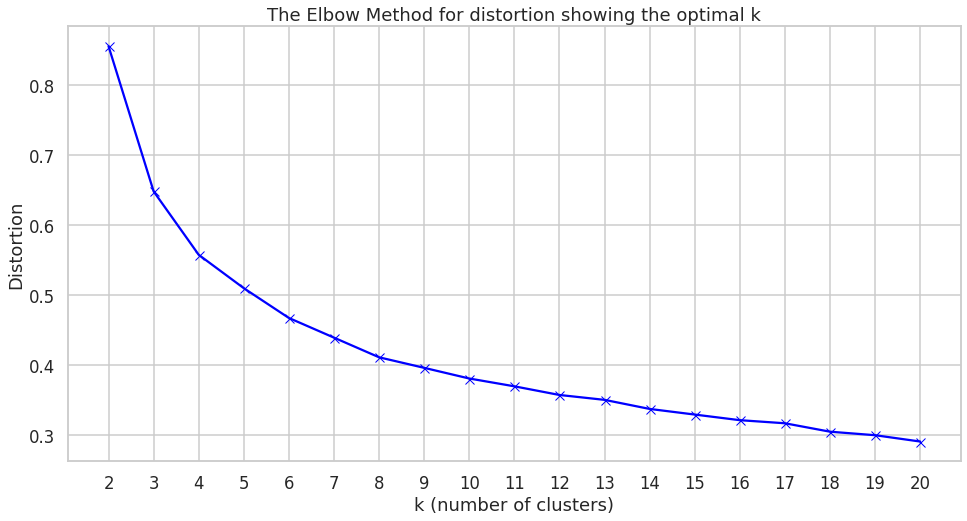

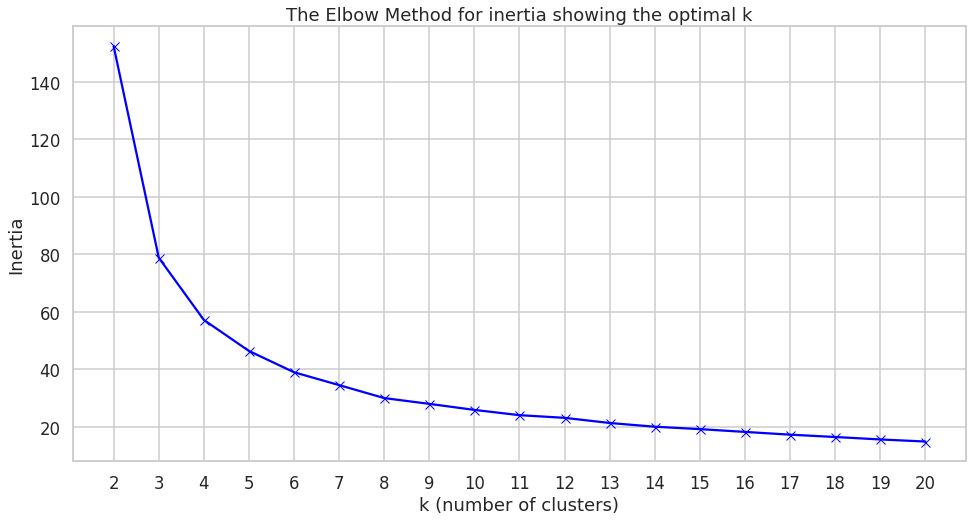

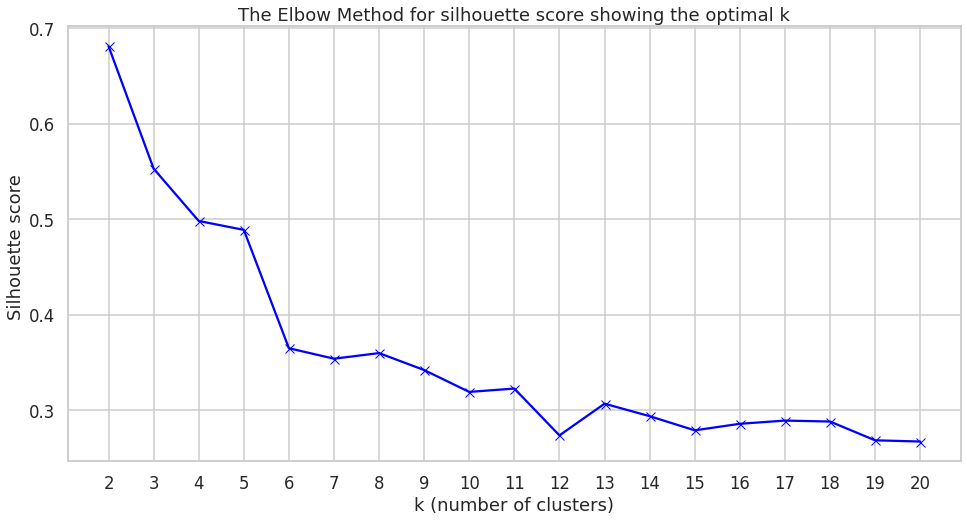

{'n_clusters': 2, 'silhouette_score': 0.6810461692117462}

In [ ]:
K_mean(iris_data.data)

In [ ]:
sns.pairplot(pd.DataFrame(iris_data.data,columns = iris_data.feature_names), kind="reg")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
# prepare transform on dataset
pca.fit(iris_data.data)
# apply transform to dataset
transformed = pca.transform(iris_data.data)
dff = pd.DataFrame(transformed,columns = ["1",'2',"3"])
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(dff, x='1', y='2', z='3',
              color='3')
fig.show()

In [ ]:
K_mean(dff)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# prepare transform on dataset
pca.fit(iris_data.data)
# apply transform to dataset
transformed = pca.transform(iris_data.data)
# dff = pd.DataFrame(transformed,columns = ["1",'2',"3"])
# import plotly.express as px
# df = px.data.iris()
# fig = px.scatter_3d(dff, x='1', y='2', z='3',
#               color='3')
# fig.show()

In [ ]:
K_mean(transformed)

In [ ]:
K_mean(iris_data.data) # 2

In [ ]:
Agglomerative_clustering(iris_data.data, linkages = ['average', 'single', 'complete'], distance_thresholds = [0.1,0.2], no_dendograms = True)
# The number of clusters is : 2 clusters with silhouette score : 0.69
# Affinity: cosine, Linkage: complete, Distance Threshold: 0.1
# Silhouette Score: 0.69